### Import TensorFlow and other libraries

In [ ]:
import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pydot

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


###Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d bishalrajbanshi/realanddeepfakeimage

Dataset URL: https://www.kaggle.com/datasets/bishalrajbanshi/realanddeepfakeimage
License(s): CC0-1.0
100% 3.76G/3.77G [00:54<00:00, 71.1MB/s]
100% 3.77G/3.77G [00:54<00:00, 73.8MB/s]


In [ ]:
! unzip /content/realanddeepfakeimage.zip

Streaming output truncated to the last 5000 lines.
  inflating: Real-and-deepfake-image/valid/real/34825.jpg  
  inflating: Real-and-deepfake-image/valid/real/34827.jpg  
  inflating: Real-and-deepfake-image/valid/real/34828.jpg  
  inflating: Real-and-deepfake-image/valid/real/34832.jpg  
  inflating: Real-and-deepfake-image/valid/real/34836.jpg  
  inflating: Real-and-deepfake-image/valid/real/34839.jpg  
  inflating: Real-and-deepfake-image/valid/real/34847.jpg  
  inflating: Real-and-deepfake-image/valid/real/34848.jpg  
  inflating: Real-and-deepfake-image/valid/real/34852.jpg  
  inflating: Real-and-deepfake-image/valid/real/34861.jpg  
  inflating: Real-and-deepfake-image/valid/real/34864.jpg  
  inflating: Real-and-deepfake-image/valid/real/34868.jpg  
  inflating: Real-and-deepfake-image/valid/real/34877.jpg  
  inflating: Real-and-deepfake-image/valid/real/34883.jpg  
  inflating: Real-and-deepfake-image/valid/real/34887.jpg  
  inflating: Real-and-deepfake-image/valid/real/3

In [ ]:
base_dir = "/content/Real-and-deepfake-image"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

### Image preparation for CNN Image Classifier

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100066 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20026 images belonging to 2 classes.


### Visualize the data

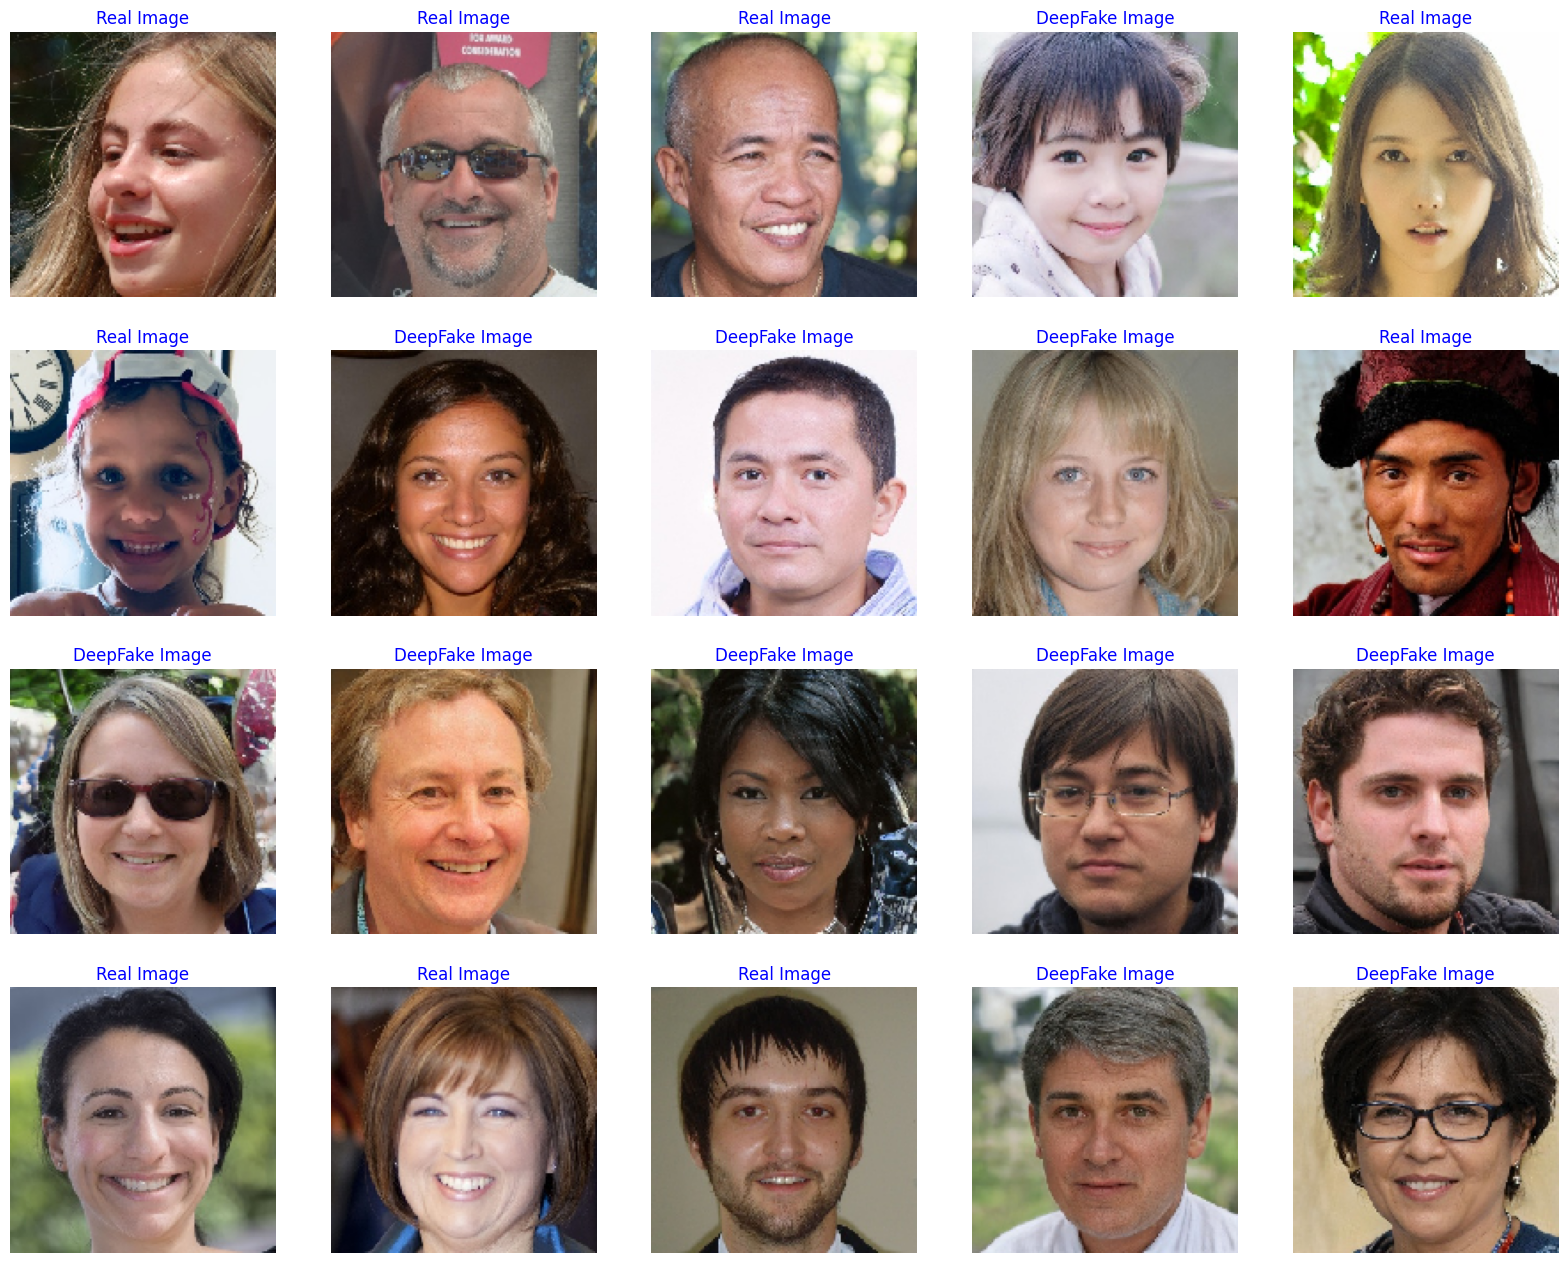

In [ ]:

plt.figure(figsize=(20, 20))
for i in range(20):
    img, label = train_generator.next()
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("DeepFake Image", color='blue', fontsize=12)
    else:
        plt.title("Real Image", color='blue', fontsize=12)
    plt.axis("off")
plt.show()

## Model architecture

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(1064, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ]
)


## Visualizing network architectures

In [ ]:
tf.keras.utils.pydot = pydot

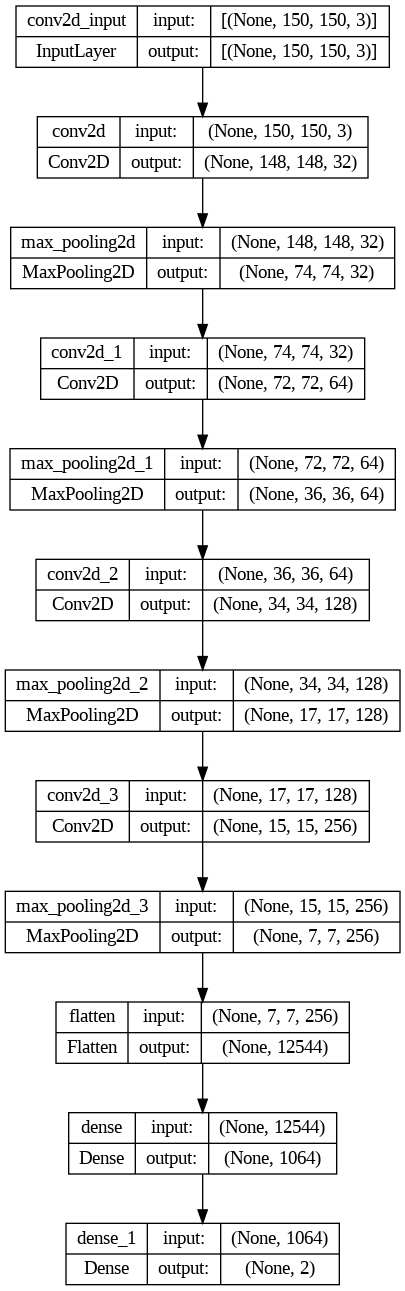

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

#### Model summary

View all the layers of the network using the model's summary method:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

#### Compile and train the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 50, verbose=1)

Epoch 1/10
1001/1001 [==============================] - 203s 202ms/step - loss: 0.4432 - accuracy: 0.7916 - val_loss: 0.3436 - val_accuracy: 0.8474
Epoch 2/10
1001/1001 [==============================] - 174s 174ms/step - loss: 0.2750 - accuracy: 0.8847 - val_loss: 0.2451 - val_accuracy: 0.9002
Epoch 3/10
1001/1001 [==============================] - 170s 170ms/step - loss: 0.1909 - accuracy: 0.9231 - val_loss: 0.2410 - val_accuracy: 0.9036
Epoch 4/10
1001/1001 [==============================] - 168s 168ms/step - loss: 0.1390 - accuracy: 0.9454 - val_loss: 0.2016 - val_accuracy: 0.9198
Epoch 5/10
1001/1001 [==============================] - 171s 171ms/step - loss: 0.1058 - accuracy: 0.9586 - val_loss: 0.1387 - val_accuracy: 0.9480
Epoch 6/10
1001/1001 [==============================] - 158s 158ms/step - loss: 0.0835 - accuracy: 0.9681 - val_loss: 0.1221 - val_accuracy: 0.9550
Epoch 7/10
1001/1001 [==============================] - 168s 168ms/step - loss: 0.0672 - accuracy: 0.9745 - val_

#### Visualize training results

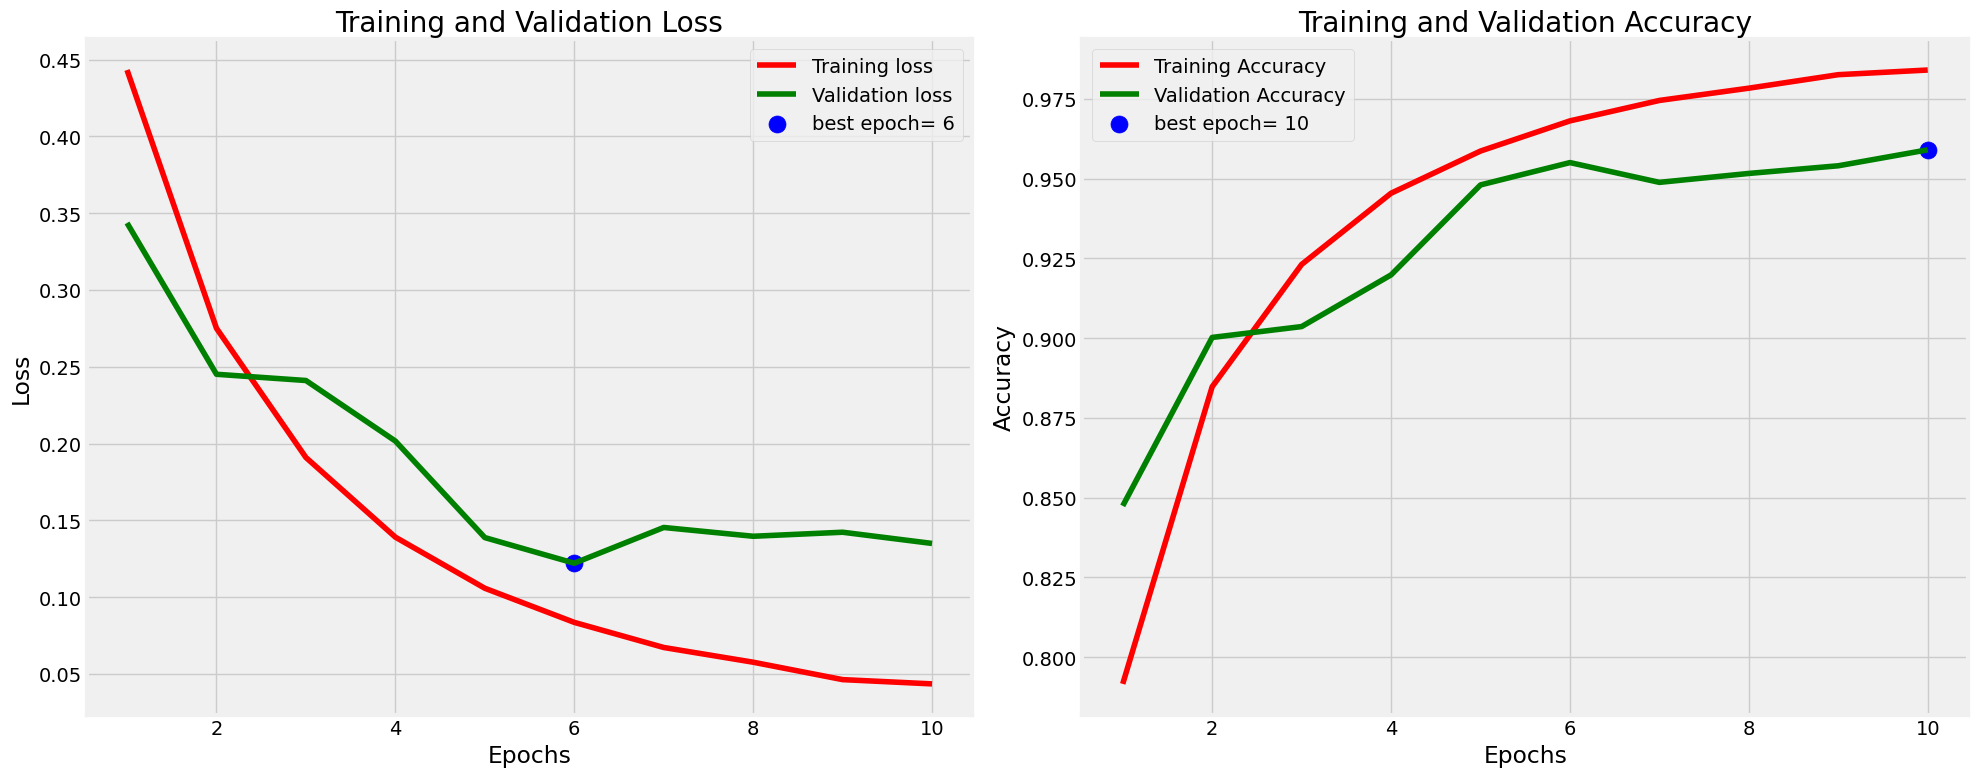

In [ ]:
import numpy as np

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Determine the best epochs
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

# Create list of epochs
Epochs = np.arange(1, len(tr_acc) + 1)

# Define labels for the best epochs
loss_label = f'best epoch= {index_loss + 1}'
acc_label = f'best epoch= {index_acc + 1}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluate the model on the test data via evaluate():

In [ ]:
len(test_generator)

201

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

201/201 [==============================] - 40s 197ms/step - loss: 0.1369 - accuracy: 0.9582


#### Predict on new data

In [ ]:
class_names = ['fake', 'real']

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/UJ8hZvc4.jpg', target_size=(150, 150, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(test_generator.class_indices)
print(result)



1/1 [==============================] - 0s 31ms/step
{'fake': 0, 'real': 1}
[[1. 0.]]


In [ ]:
print(
    "This image is {} with a {:.2f} percentage."
    .format(class_names[np.argmax(result)], 95 * np.max(result))
)

This image is fake with a 95.00 percentage.


### Save the entire model

In [ ]:
model.save("deepFake_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/best_model.h5')

In [ ]:
model.save("model.keras")

In [ ]:
model.save("C:\Users\csc\OneDrive\Desktop\HADOOP")

In [ ]:
# model = tf.keras.models.load_model("E:/Machine Learning Series/Datasets/archive/real_vs_fake/save_model/")

In [ ]:
# model.summary()

In [ ]:
new_model =tf.keras.models.load_model("deep_fake_model.h5")

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0